<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/diabetes_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Loading the dataset
import sklearn.datasets as datasets
diabetes = datasets.load_diabetes()

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [7]:
diabetes.data.shape

(442, 10)

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
#Exploring data with Pandas
import pandas as pd
pd.set_option('precision',4)
pd.set_option('max_columns',9)
pd.set_option('display.width',None)

In [14]:
diabetes_df = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
diabetes_df['DiseaseProg'] = pd.Series(diabetes.target)
diabetes_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,DiseaseProg
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [16]:
diabetes_df.describe()

,age,sex,bmi,bp,...,s4,s5,s6,DiseaseProg
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,...,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-3.6343e-16,1.3083e-16,-8.0453e-16,1.2817e-16,...,3.7773e-16,-3.8309e-16,-3.4129e-16,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,...,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,...,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,...,-3.9493e-02,-3.3249e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6706e-03,...,-2.5923e-03,-1.9476e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,...,3.4309e-02,3.2433e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,...,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


In [17]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [19]:
#Visualizing with Features
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

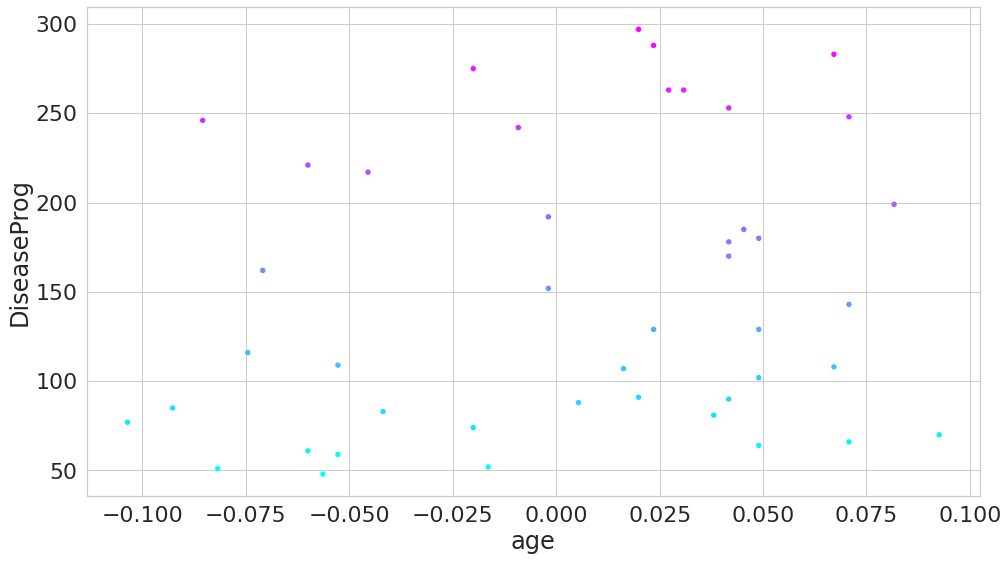

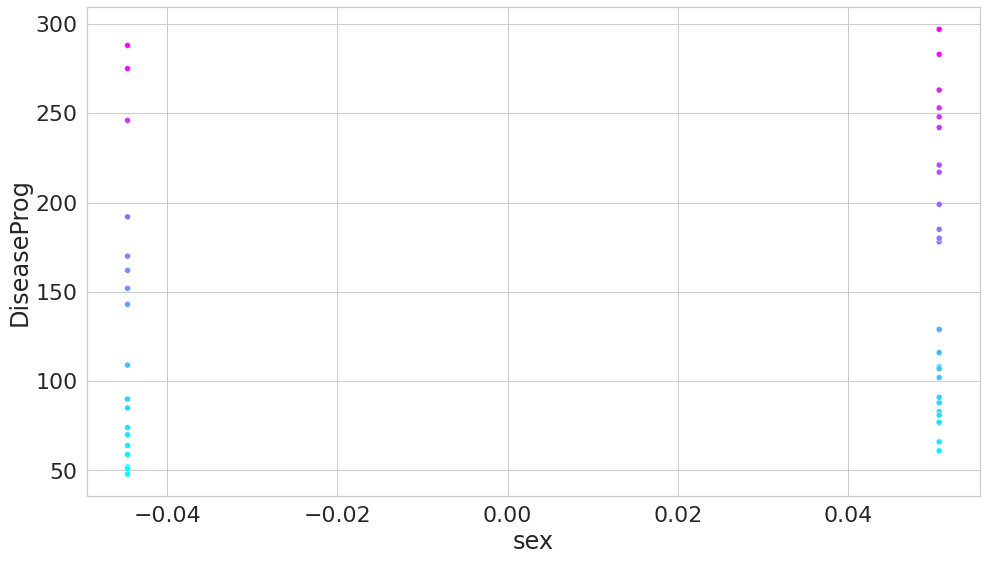

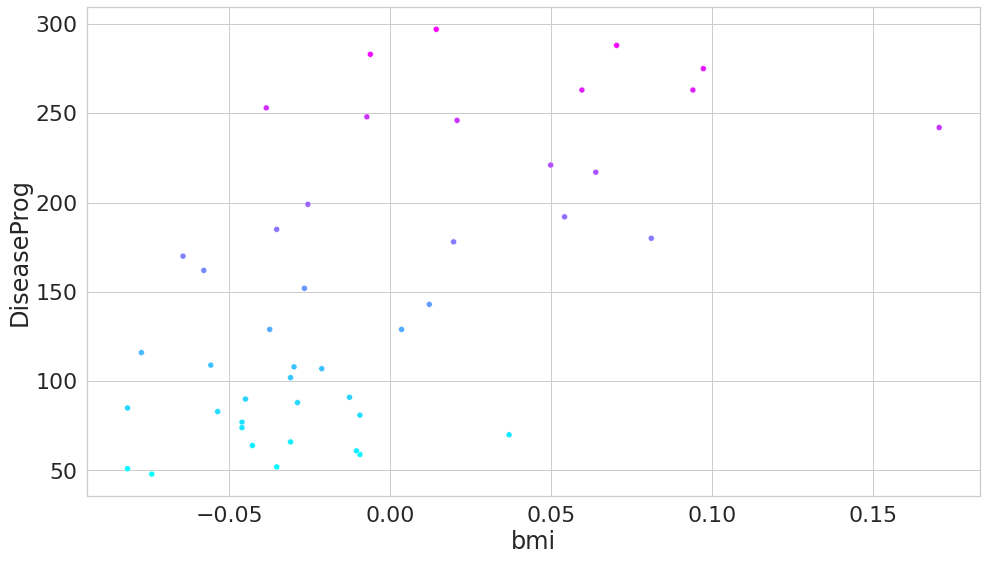

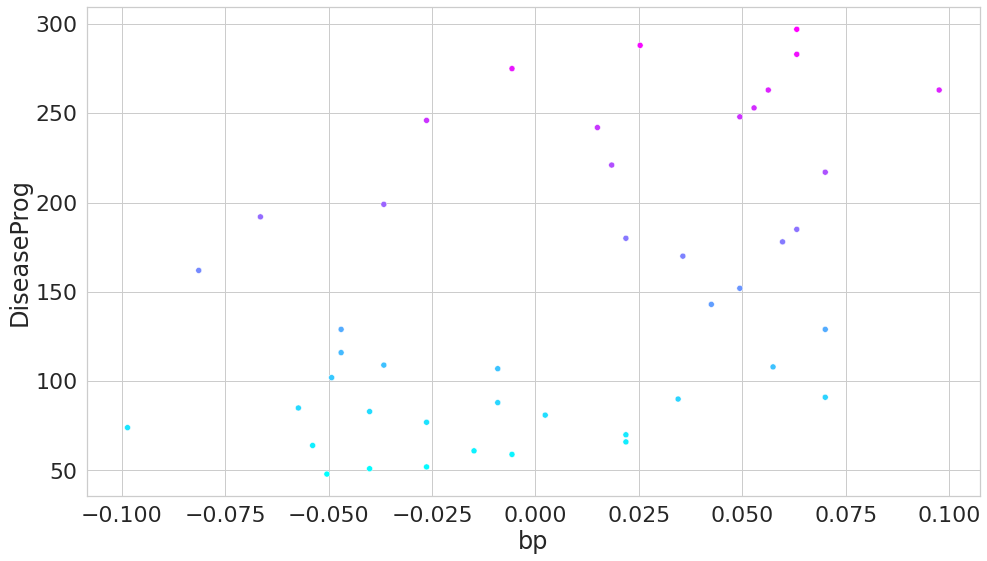

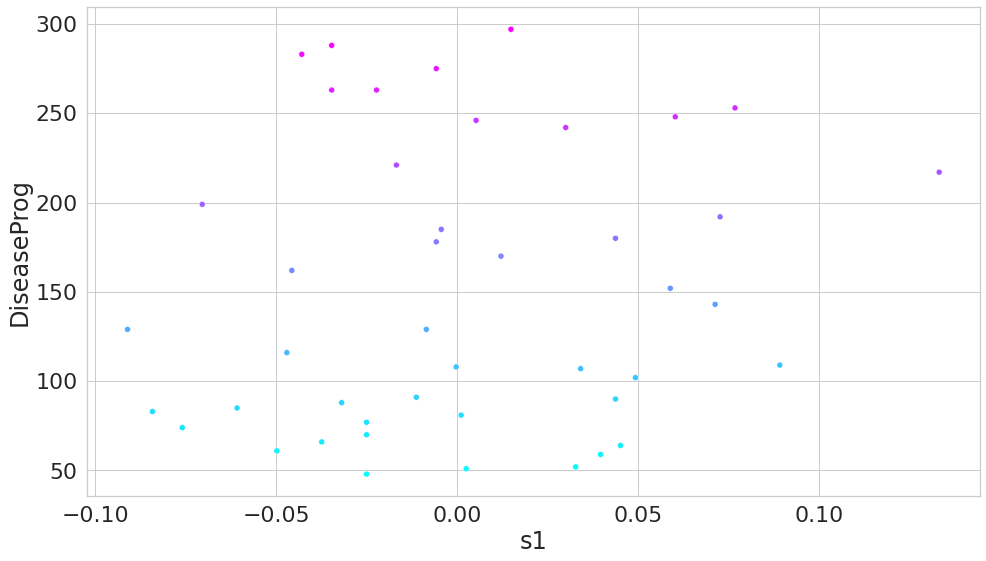

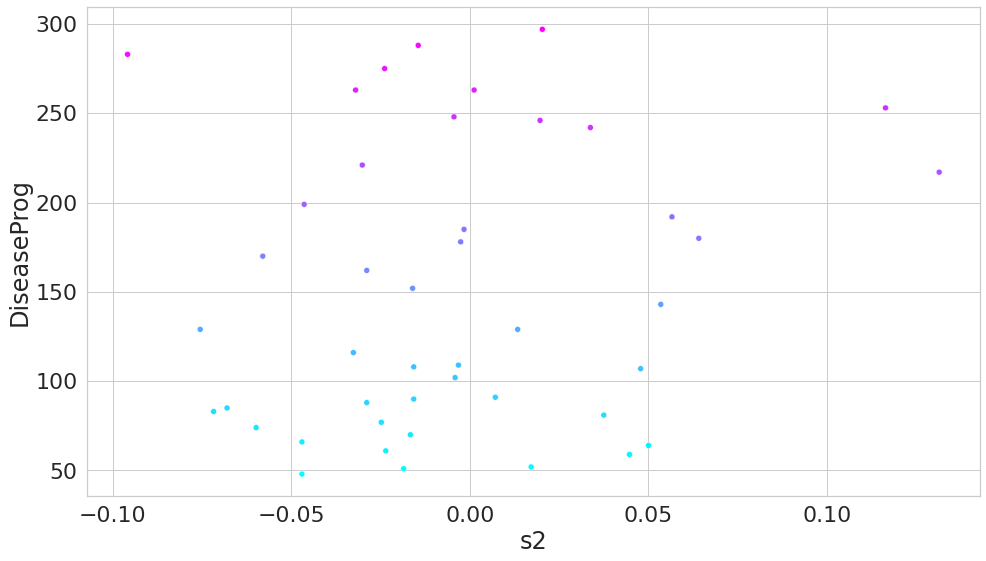

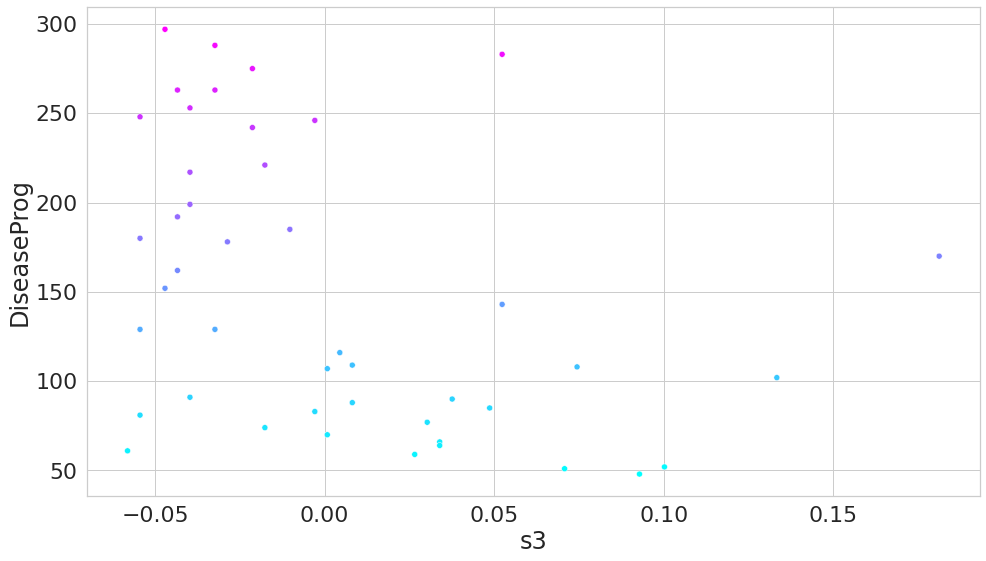

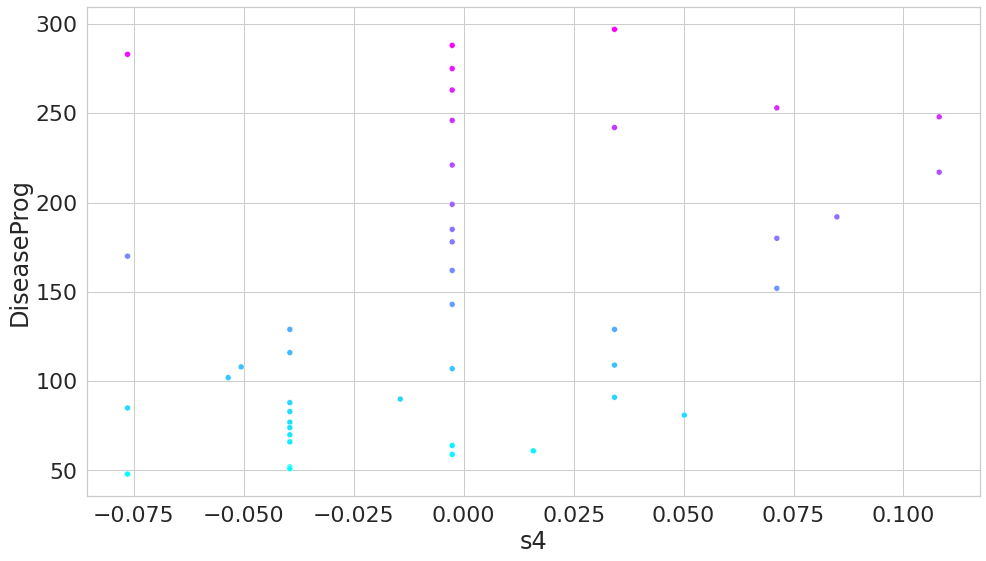

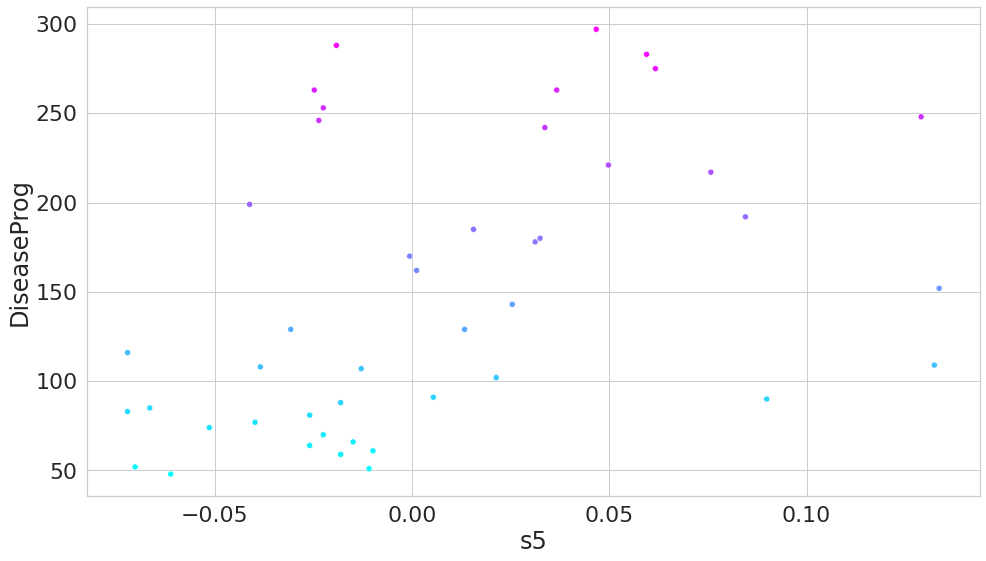

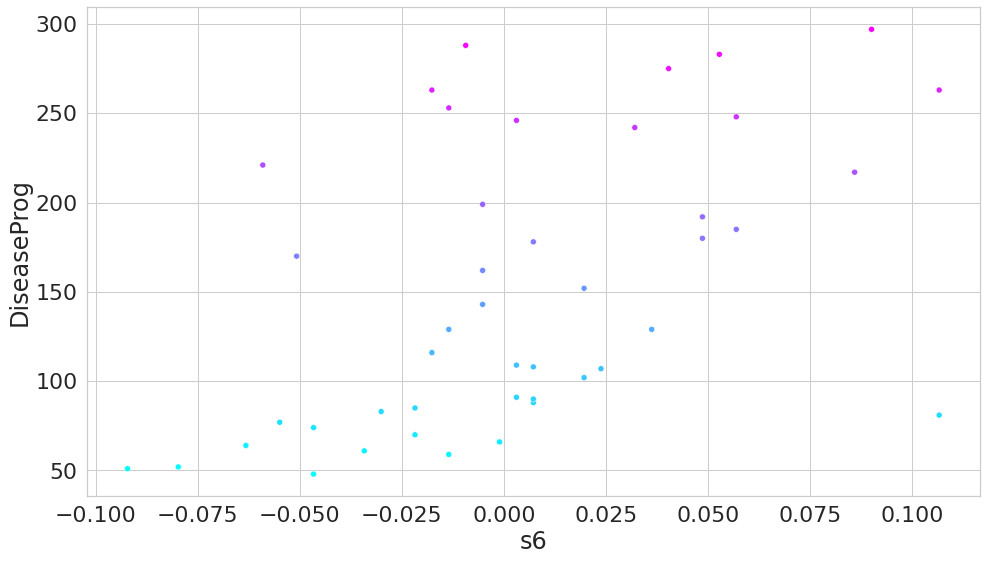

In [23]:
for feature in diabetes.feature_names:
  plt.figure(figsize=(16,9))
  sns.scatterplot(data=sample_df, x=feature, y='DiseaseProg',hue='DiseaseProg',palette='cool',legend=False)

In [24]:
#Splitting the data for training and testing using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)


In [26]:
X_train.shape

(331, 10)

In [29]:
X_test.shape

(111, 10)

In [30]:
#Training the Model
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

In [31]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
for i,name in enumerate(diabetes.feature_names):
  print(f'{name:>5}: {linear_regression.coef_[i]:>3}')

  age: -60.221893331882335
  sex: -266.45890749037505
  bmi: 523.0596748020042
   bp: 310.51485159166873
   s1: -336.17030792547865
   s2: 137.344544538294
   s3: -131.13560429688624
   s4: -1.1485501589064313
   s5: 622.3374924905781
   s6: 60.46751763603552


In [41]:
#Testing the model
predicted = linear_regression.predict(X_test)
expected = y_test

In [44]:
predicted[:5]

array([115.46727109,  83.46033257, 160.77912055, 187.65807631,
        72.72355267])

In [45]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [49]:
#Visualizing the Expected vs Predicted Disease Progression
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

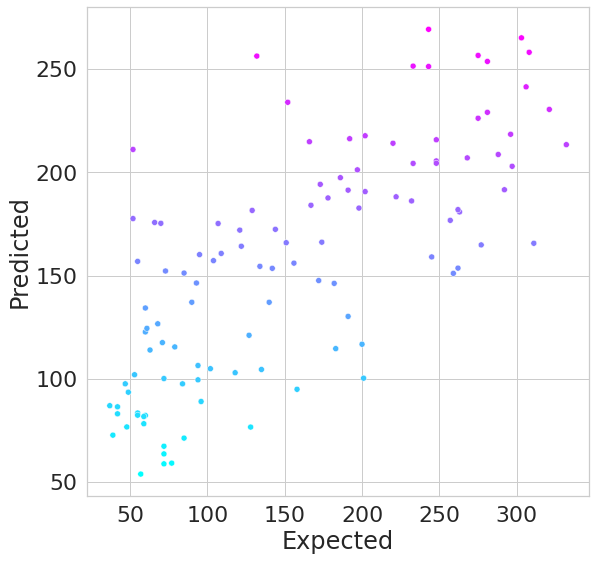

In [50]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x="Expected", y= "Predicted", palette='cool', hue='Predicted', legend=False)

In [51]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

In [53]:
axes.set_xlim(start,end)

(37.0, 332.0)

In [54]:
axes.set_ylim(start,end)

(37.0, 332.0)

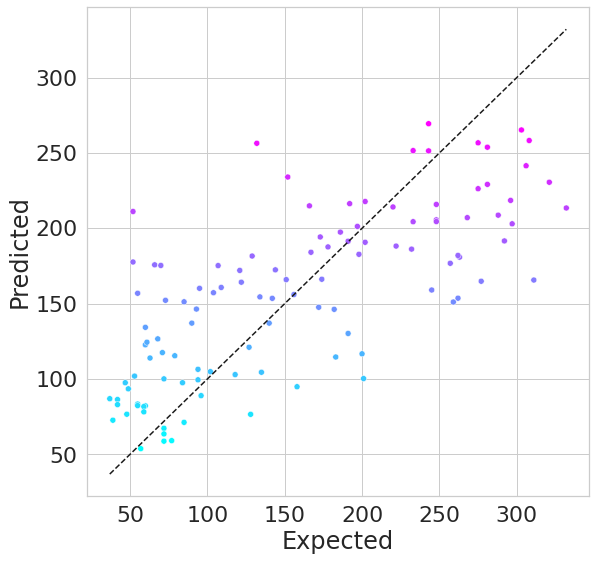

In [58]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x="Expected", y= "Predicted", palette='cool', hue='Predicted', legend=False)
line = plt.plot([start,end],[start,end],'k--')

In [59]:
#Regression Model Metrics
from sklearn import metrics
metrics.r2_score(expected, predicted)

0.5322440129151977

In [61]:
metrics.mean_squared_error(expected, predicted)

3458.2229332614693

In [62]:
#Choosing the Best Model
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = { 
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [63]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
